In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mp
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read in the cleaned, dummied data
df = pd.read_pickle('/content/drive/MyDrive/data/heart_cleaned_dummy.pkl')

df.reset_index(drop=True, inplace=True)
X = df.iloc[:,:-1]
y = df.HeartDisease
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,45,110,264,0,132,1.2,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1
742,68,144,193,1,141,3.4,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1
743,57,130,131,0,115,1.2,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1
744,57,130,236,0,174,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1


In [ ]:
y.value_counts()

0    390
1    356
Name: HeartDisease, dtype: int64

In [ ]:
# standardize the data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
scaler = StandardScaler()

#df = pd.DataFrame(scaler.fit_transform(df.iloc[:,:-1]),columns = df.columns[:-1])




In [ ]:
#df['HeartDisease'] = y
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,45,110,264,0,132,1.2,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1
742,68,144,193,1,141,3.4,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1
743,57,130,131,0,115,1.2,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1
744,57,130,236,0,174,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1


In [ ]:
# doing some rough estimate
# radial kernal
train, test = train_test_split(df, test_size= 0.2, random_state= 1234)

svc =SVC(random_state= 1234, kernel= 'rbf', C= 1, gamma= 0.1)
pipeline = Pipeline(steps = [('scaler', scaler), ('estimator', svc)])
pipeline.fit(X = train.iloc[:,:-1],y = train.iloc[:,-1] )


Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator', SVC(C=1, gamma=0.1, random_state=1234))])

In [ ]:
#svm.dual_coef_

In [ ]:
# the score
y_pred = pipeline.predict( X = test.iloc[:,:-1])
confusion_matrix(y_true= test.iloc[:,-1], y_pred = y_pred)


array([[73,  9],
       [ 8, 60]])

In [ ]:
accuracy_score(test.HeartDisease, y_pred= y_pred)
# pretty good, but not cross-validated

0.8866666666666667

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# the next search uses the hybrid apprach: using F-score based filter method feature selection first, then uses wapper method: cross-validated SVM to see which one performs the best

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [ ]:
# grid search
# the pipeline integrates univarient feature selection, standardization and SVM
# serching through the best number of features to keep, the best kernals and the best parameters for the kernals
from sklearn.feature_selection import SelectKBest, f_classif

svc = SVC()
scaler = StandardScaler()
anova_filter = SelectKBest(f_classif)
n_range = np.linspace(1,20,20).astype('int').tolist()

pipeline = Pipeline(steps = [('anova',anova_filter),('scaler', scaler), ('estimator', svc)])
parameters = [
    {'anova__k': n_range,'estimator__kernel': ['linear'], 'estimator__C': [0.01, 0.1, 1, 10, 100]},
    {'anova__k': n_range,'estimator__kernel': ['rbf'],    'estimator__C': [0.01, 0.1, 1, 10, 100], 'estimator__gamma':  [0.001, 0.01, 0.1, 1, 2,'scale','auto']},
    {'anova__k': n_range,'estimator__kernel': ['poly'],   'estimator__C': [0.01, 0.1, 1, 10, 100], 'estimator__degree': [2,3,5,7,9]},
    {'anova__k': n_range,'estimator__kernel': ['sigmoid'],  'estimator__C': [0.01, 0.1, 1, 10, 100],'estimator__gamma':  [0.001, 0.01, 0.1, 1, 2,'scale','auto']}
  
    ]



clf = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5)
clf.fit(X = df.iloc[:,:-1], y=df.HeartDisease) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('anova', SelectKBest()),
                                       ('scaler', StandardScaler()),
                                       ('estimator', SVC())]),
             param_grid=[{'anova__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                          'estimator__C': [0.01, 0.1, 1, 10, 100],
                          'estimator__kernel': ['linear']},
                         {'anova__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                          'estimator__C': [0.01, 0....
                         {'anova__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                          'estimator__C': [0.01, 0.1, 1, 10, 100],
                          'estimator__degree': [2, 3, 5, 7, 9],
                     

In [ ]:
init_results = pd.DataFrame(clf.cv_results_)[['param_estimator__kernel','param_estimator__C','param_estimator__gamma','param_estimator__degree','param_anova__k','mean_test_score','rank_test_score']]
init_results.sort_values('mean_test_score', ascending=False)
# 14 features seem to be most important

,param_estimator__kernel,param_estimator__C,param_estimator__gamma,param_estimator__degree,param_anova__k,mean_test_score,rank_test_score
1131,poly,0.1,NaN,3,14,0.871284,1
1136,poly,1,NaN,3,14,0.869924,2
564,rbf,0.1,0.1,NaN,14,0.868600,3
567,rbf,0.1,scale,NaN,14,0.868582,4
568,rbf,0.1,auto,NaN,14,0.868582,4
...,...,...,...,...,...,...,...
825,poly,0.01,NaN,2,2,0.522792,1839
850,poly,0.01,NaN,2,3,0.522792,1839
875,poly,0.01,NaN,2,4,0.522792,1839
566,rbf,0.1,2,NaN,14,0.522792,1839


Text(0.42499999999999716, 0.5, 'cross-validated accuracy')

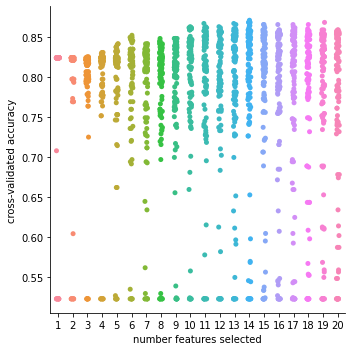

In [ ]:
# the accuracy based on number of features selected
sns.catplot(x = 'param_anova__k', y ='mean_test_score', data = init_results)
mp.pyplot.xlabel('number features selected')
mp.pyplot.ylabel('cross-validated accuracy')

In [ ]:
# looks like 14 features was included to score the best results, but not definatively 

anova_filter = SelectKBest(score_func = f_classif, k =14)
anova_filter.fit(df.iloc[:,:-1], y = df.iloc[:,-1])
anova_filter.scores_

array([ 72.83911596,  23.02030868,   8.11385082,  19.69607753,
       123.42507848, 242.36427902,  69.75452452,  69.75452452,
       280.10241717, 122.224882  ,  38.62144431,   2.15690925,
         3.6215047 ,  13.44987484,   6.90900229, 325.76678888,
       325.76678888,  13.23257053, 400.50205245, 555.33746087])

In [ ]:
# feature importance based on F-values
F_scores = pd.DataFrame(index = df.columns[:-1].tolist())
F_scores['F_scores'] = anova_filter.scores_
F_scores.sort_values('F_scores',ascending= False,inplace=True)
F_scores['rank'] = [i for i in range(1,21)]
F_scores

,F_scores,rank
ST_Slope_Up,555.337461,1
ST_Slope_Flat,400.502052,2
ExerciseAngina,325.766789,3
ExerciseAngina_N,325.766789,4
ChestPainType_ASY,280.102417,5
Oldpeak,242.364279,6
MaxHR,123.425078,7
ChestPainType_ATA,122.224882,8
Age,72.839116,9
Sex,69.754525,10


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

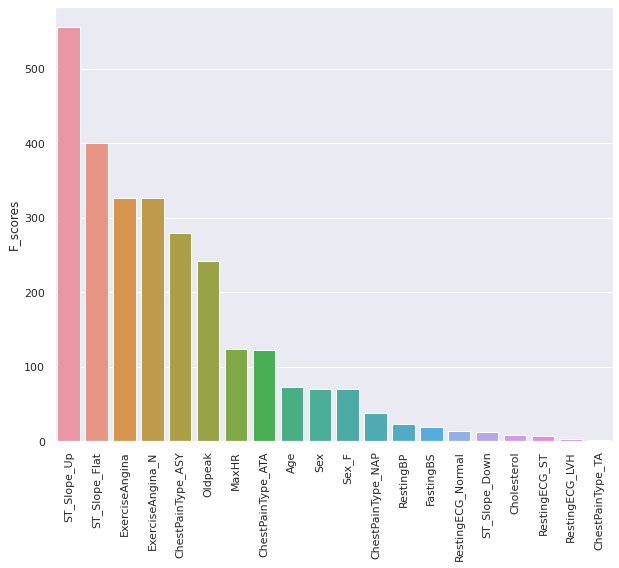

In [ ]:
# Graph showing the f-scores of each feature, Keeping on the top 14 so far gave us the best performance for SVM

sns.barplot(x=F_scores.index, y = F_scores.F_scores)
#sns.set(rc = {'figure.figsize':(10,8)})
mp.pyplot. xticks(rotation =90)

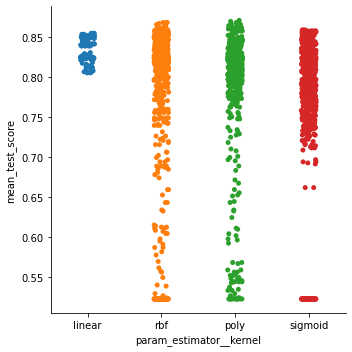

In [ ]:
# accuracy based on which kernal used
sns.catplot(x = 'param_estimator__kernel', y ='mean_test_score', data = init_results)

In [ ]:
# more detailed search
C_range = []
import numpy as np
C_range = np.linspace(0.01, 0.1,11).round(2).tolist()

for i in np.linspace(0.2, 1.1,11).round(1).tolist():
  C_range.append(i)

for i in range(10,101,10):
  C_range.append(i)

gamma_range =[]
for i in np.linspace(0.001, 0.01,10).round(3).tolist():
  gamma_range.append(i)

for i in np.linspace(0.02, 0.1,10).round(2).tolist():
  gamma_range.append(i)

for i in np.linspace(0.1, 0.2,10).round(2).tolist():
  gamma_range.append(i)
gamma_range


[0.001,
 0.002,
 0.003,
 0.004,
 0.005,
 0.006,
 0.007,
 0.008,
 0.009,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2]

In [ ]:
degree_range = np.linspace(2,10,9).astype(int).tolist()
degree_range

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
# DO NOT Run the next 2 cells again
pipeline = Pipeline(steps = [('scaler', scaler), ('estimator', svc)])
parameters = [
    {'estimator__kernel': ['linear'], 'estimator__C': C_range},
    {'estimator__kernel': ['rbf'],    'estimator__C': C_range, 'estimator__gamma':  gamma_range},
    {'estimator__kernel': ['poly'],   'estimator__C': C_range, 'estimator__degree': degree_range}]


In [ ]:
svc = SVC()
clf = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5)
clf.fit(X = df.iloc[:,:-1], y=df.HeartDisease) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('estimator', SVC())]),
             param_grid=[{'estimator__C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                           0.06, 0.07, 0.08, 0.09, 0.1, 0.2,
                                           0.3, 0.4, 0.5, 0.6, 0.7, 0.7, 0.8,
                                           0.9, 1.0, 1.1, 10, 20, 30, 40, 50,
                                           60, 70, 80, ...],
                          'estimator__kernel': ['linear']},
                         {'estimator__C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                           0.06, 0.07, 0.08, 0.09, 0...
                                               0.009, 0.01, 0.02, 0.03, 0.04,
                                               0.05, 0.06, 0.06, 0.07, 0.08,
                                               0.09, 0.1, 0.1, 0.11, 0.12, 0.13,
                             

In [ ]:
adv_results = pd.DataFrame(clf.cv_results_)[['param_estimator__kernel','param_estimator__C','param_estimator__gamma','param_estimator__degree','mean_test_score','rank_test_score']]
adv_results.sort_values('mean_test_score', ascending=False)

,param_estimator__kernel,param_estimator__C,param_estimator__gamma,param_estimator__degree,mean_test_score,rank_test_score
505,rbf,0.6,0.13,NaN,0.869888,1
595,rbf,0.8,0.13,NaN,0.868555,2
625,rbf,0.9,0.13,NaN,0.868555,2
504,rbf,0.6,0.12,NaN,0.868546,4
566,rbf,0.7,0.14,NaN,0.867213,5
...,...,...,...,...,...,...
55,rbf,0.01,0.13,NaN,0.522792,1243
57,rbf,0.01,0.16,NaN,0.522792,1243
152,rbf,0.05,0.001,NaN,0.522792,1243
58,rbf,0.01,0.17,NaN,0.522792,1243


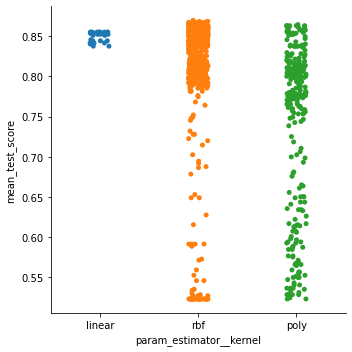

In [ ]:
sns.catplot(x = 'param_estimator__kernel', y ='mean_test_score', data = adv_results)

In [ ]:
# the best model parameter
svc = SVC(kernel= 'rbf', C=0.6, gamma= 0.13)
scaler = StandardScaler()
pipe = Pipeline(steps = [('scaler', scaler), ('estimator', svc)])
from sklearn.model_selection import cross_validate as cross_val 
cross_val_data = cross_val(pipe, X = df.iloc[:,:-1], y = df.HeartDisease, cv = 5, scoring='accuracy')

In [ ]:
cross_val_data['test_score'].mean()

0.8551767337807605

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,45,110,264,0,132,1.2,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1
742,68,144,193,1,141,3.4,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1
743,57,130,131,0,115,1.2,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1
744,57,130,236,0,174,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1


In [ ]:
# feature selection based on Resursive Feature elimination(wrapper)


from sklearn.feature_selection import RFECV  # selects the best number of features based on cross validated estimator performance
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
from sklearn.feature_selection import RFE    #simply selects the specified number of features based on importance
#Importing the Recursive Feature Selection package
svc = SVC(kernel= 'linear', C = 10)

pipeline = Pipeline(steps = [('scaler', scaler), ('estimator', svc)])

rfecv = RFECV(estimator= svc, cv=5, scoring="accuracy")
rfecv.fit(X = df.iloc[:,:-1], y=df.HeartDisease)
print('Selected', rfecv.n_features_, 'features:')
X.columns[rfecv.support_]

Selected 17 features:


Index(['Age', 'RestingBP', 'FastingBS', 'Oldpeak', 'Sex_F', 'Sex',
       'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina', 'ST_Slope_Down', 'ST_Slope_Flat',
       'ST_Slope_Up'],
      dtype='object')

In [ ]:
# selected all features

rank = rfecv.ranking_
list(rank)

[1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
rank_chart = pd.DataFrame(index= df.columns[:-1], data= rank,columns =['rank'])
rank_chart.sort_values('rank',inplace= True)
rank_chart

,rank
Age,1
ST_Slope_Down,1
ExerciseAngina,1
ExerciseAngina_N,1
RestingECG_ST,1
RestingECG_Normal,1
RestingECG_LVH,1
ChestPainType_NAP,1
ST_Slope_Flat,1
ChestPainType_ATA,1


In [ ]:
tf = rfecv.support_

In [ ]:
# cross - validation feature select
 ## choose linear and C =10 becasue the cross validated parameter result before showed this has highest accuracy
svc = SVC(kernel= 'linear', C = 10)
svc.fit(X = df.iloc[:,:-1],y = df.HeartDisease)


SVC(C=10, kernel='linear')

In [ ]:
coefs = svc.coef_
x=df.columns[:-1]
coefs = coefs.tolist()


In [ ]:
x

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'Sex', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

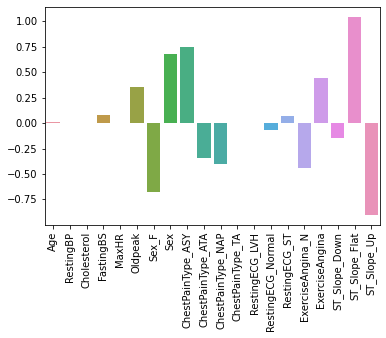

In [ ]:
# feature importance according to coefficients of linear SVM
# positive enteries means that it's negativly related to the target Heart Disease
p=sns.barplot(x=x, y=coefs[0])

p = p.set_xticklabels(labels=df.columns[:-1], rotation=90)

In [ ]:
# same procedure with selected columns
df1 = df[X.columns[tf]]
df1

,Age,RestingBP,FastingBS,Oldpeak,Sex_F,Sex,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,0,0.0,0,1,0,1,0,0,1,0,1,0,0,0,1
1,49,160,0,1.0,1,0,0,0,1,0,1,0,1,0,0,1,0
2,37,130,0,0.0,0,1,0,1,0,0,0,1,1,0,0,0,1
3,48,138,0,1.5,1,0,1,0,0,0,1,0,0,1,0,1,0
4,54,150,0,0.0,0,1,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,45,110,0,1.2,0,1,0,0,0,0,1,0,1,0,0,1,0
742,68,144,1,3.4,0,1,1,0,0,0,1,0,1,0,0,1,0
743,57,130,0,1.2,0,1,1,0,0,0,1,0,0,1,0,1,0
744,57,130,0,0.0,1,0,0,1,0,1,0,0,1,0,0,1,0


In [ ]:
pipeline = Pipeline(steps = [('scaler', scaler), ('estimator', svc)])
parameters = [
    {'estimator__kernel': ['linear'], 'estimator__C': C_range},
    {'estimator__kernel': ['rbf'],    'estimator__C': C_range, 'estimator__gamma':  gamma_range},
    {'estimator__kernel': ['poly'],   'estimator__C': C_range, 'estimator__degree': degree_range}]


In [ ]:
svc = SVC()
clf = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5)
clf.fit(X = df1.iloc[:,:], y=df.HeartDisease) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('estimator',
                                        SVC(C=10, kernel='linear'))]),
             param_grid=[{'estimator__C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                           0.06, 0.07, 0.08, 0.09, 0.1, 0.2,
                                           0.3, 0.4, 0.5, 0.6, 0.7, 0.7, 0.8,
                                           0.9, 1.0, 1.1, 10, 20, 30, 40, 50,
                                           60, 70, 80, ...],
                          'estimator__kernel': ['linear']},
                         {'estimator__C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                           0...
                                               0.009, 0.01, 0.02, 0.03, 0.04,
                                               0.05, 0.06, 0.06, 0.07, 0.08,
                                               0.09, 0.1, 0.1, 0.11, 0.12

In [ ]:
# the relative HIGH varient of the radial and polynomial kernals of the Sorpport Vector Machine
# leads to slightly different results (the selection in RFECV method was linear kernal)
# due to the "get_importance" parameter of the RFECV needing a 'coef_' fucntion
# but both "radial" and 'polynomial' kernal type's coefficients are complex intereactions 
# (the importance of one feature varies depending on the values of the other features)


select_results = pd.DataFrame(clf.cv_results_)[['param_estimator__kernel','param_estimator__C','param_estimator__gamma','param_estimator__degree','mean_test_score','rank_test_score']]
select_results.sort_values('mean_test_score', ascending=False)

,param_estimator__kernel,param_estimator__C,param_estimator__gamma,param_estimator__degree,mean_test_score,rank_test_score
1101,poly,0.3,NaN,3,0.867230,1
1110,poly,0.4,NaN,3,0.867221,2
1119,poly,0.5,NaN,3,0.867213,3
1092,poly,0.2,NaN,3,0.865906,4
502,rbf,0.6,0.1,NaN,0.865879,5
...,...,...,...,...,...,...
66,rbf,0.02,0.005,NaN,0.522792,1246
36,rbf,0.01,0.005,NaN,0.522792,1246
182,rbf,0.06,0.001,NaN,0.522792,1246
57,rbf,0.01,0.16,NaN,0.522792,1246


In [ ]:
# more detailed grid search using F-value as filter, more parameter values for the different kernals 

C_range = []
import numpy as np
C_range = np.linspace(0.01, 0.1,11).round(2).tolist()

for i in np.linspace(0.2, 1.1,11).round(1).tolist():
  C_range.append(i)

for i in range(10,101,10):
  C_range.append(i)

gamma_range =[]
for i in np.linspace(0.001, 0.01,10).round(3).tolist():
  gamma_range.append(i)

for i in np.linspace(0.02, 0.1,9).round(2).tolist():
  gamma_range.append(i)

for i in np.linspace(0.1, 1,10).round(2).tolist():
  gamma_range.append(i)

gamma_range.append('scale')
gamma_range.append('auto')

degree_range = np.linspace(2,10,9).astype(int).tolist()




In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

svc = SVC()
scaler = StandardScaler()
anova_filter = SelectKBest(f_classif)
n_range = np.linspace(10,20,10).astype('int').tolist()

pipeline = Pipeline(steps = [('anova',anova_filter),('scaler', scaler), ('estimator', svc)])
parameters = [
    {'anova__k': n_range,'estimator__kernel': ['linear'], 'estimator__C': C_range},
    {'anova__k': n_range,'estimator__kernel': ['rbf'],    'estimator__C': C_range, 'estimator__gamma': gamma_range },
    {'anova__k': n_range,'estimator__kernel': ['poly'],   'estimator__C': C_range, 'estimator__degree': degree_range},
    {'anova__k': n_range,'estimator__kernel': ['sigmoid'],  'estimator__C': C_range,'estimator__gamma':  gamma_range}
]
  

In [ ]:
clf = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5)
clf.fit(X = df.iloc[:,:-1], y=df.HeartDisease) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('anova', SelectKBest()),
                                       ('scaler', StandardScaler()),
                                       ('estimator', SVC())]),
             param_grid=[{'anova__k': [10, 11, 12, 13, 14, 15, 16, 17, 18, 20],
                          'estimator__C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                           0.06, 0.07, 0.08, 0.09, 0.1, 0.2,
                                           0.3, 0.4, 0.5, 0.6, 0.7, 0.7, 0.8,
                                           0.9, 1.0, 1.1, 10, 20, 30, 40, 50,
                                           60, 70, 80, ...],
                          'estimator__kernel': ['linear']},
                         {...
                          'estimator__C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                           0.06, 0.07, 0.08, 0.09, 0.1, 0.2,
                                           0.3, 0.4, 0.5, 0.6, 0.7, 0.7, 0.8,
       

In [ ]:
anova_results = pd.DataFrame(clf.cv_results_)[['param_estimator__kernel','param_estimator__C','param_estimator__gamma','param_estimator__degree','param_anova__k','mean_test_score','rank_test_score']]
anova_results.sort_values('mean_test_score', ascending=False)
# 14 features seem to be most important -- consistance as the result before
# best accuracy is 0.8726

,param_estimator__kernel,param_estimator__C,param_estimator__gamma,param_estimator__degree,param_anova__k,mean_test_score,rank_test_score
11501,poly,0.3,NaN,3,14,0.872617,1
11555,poly,0.8,NaN,3,14,0.872617,1
1699,rbf,0.3,0.07,NaN,11,0.872600,3
11519,poly,0.5,NaN,3,14,0.871284,4
11438,poly,0.06,NaN,3,14,0.871284,4
...,...,...,...,...,...,...,...
3385,rbf,0.03,0.9,NaN,13,0.521450,23035
1369,rbf,0.02,0.8,NaN,11,0.521450,23035
2325,rbf,0.01,0.3,NaN,12,0.521450,23035
2361,rbf,0.02,0.8,NaN,12,0.521450,23035


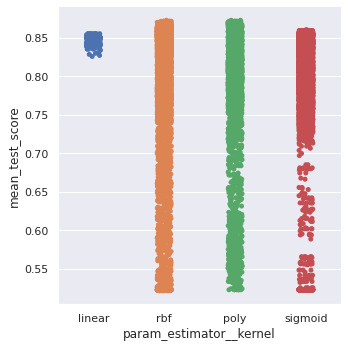

In [ ]:
sns.catplot(x = 'param_estimator__kernel', y ='mean_test_score', data = anova_results)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pca = PCA()
svc = SVC()
scaler = StandardScaler()
anova_filter = SelectKBest(f_classif, k =14)
n_range = np.linspace(3,10,7).astype('int').tolist()


pipeline = Pipeline(steps = [('anova',anova_filter),('scaler', scaler), ('PCA',pca),('estimator', svc)])
parameters = [
    {'PCA__n_components':n_range ,'estimator__kernel': ['linear'], 'estimator__C': C_range},
    {'PCA__n_components':n_range,'estimator__kernel': ['rbf'],    'estimator__C': C_range, 'estimator__gamma': gamma_range },
    {'PCA__n_components':n_range ,'estimator__kernel': ['poly'],   'estimator__C': C_range, 'estimator__degree': degree_range},
    {'PCA__n_components':n_range ,'estimator__kernel': ['sigmoid'],  'estimator__C': C_range,'estimator__gamma':  gamma_range}
]

In [ ]:
clf = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5)
clf.fit(X = df.iloc[:,:-1], y=df.HeartDisease) 


KeyError: ignored

In [ ]:
pca_results = pd.DataFrame(clf.cv_results_)[['param_estimator__kernel','param_estimator__C','param_estimator__gamma','param_estimator__degree','param_PCA__n_components','mean_test_score','rank_test_score']]
pca_results.rename(columns= {'param_estimator__kernel': 'kernel type','param_estimator__C': 'C value','param_estimator__gamma': 'gamma value','param_estimator__degree': 'degree(poly kernal)','param_PCA__n_components': 'number of PCA components','mean_test_score':'cross-validated accuracy','rank_test_score': 'rank'}, inplace = True)
pca_results.sort_values('cross-validated accuracy', ascending=False,inplace=True)
pca_results

,kernel type,C value,gamma value,degree(poly kernal),number of PCA components,cross-validated accuracy,rank
2819,rbf,0.9,0.4,NaN,5,0.879311,1
2788,rbf,0.8,0.4,NaN,5,0.879311,1
2850,rbf,1,0.4,NaN,5,0.879311,1
7772,poly,0.04,NaN,3,5,0.879302,4
2698,rbf,0.6,0.7,NaN,5,0.877978,5
...,...,...,...,...,...,...,...
1309,rbf,0.04,0.001,NaN,4,0.522792,15607
15174,sigmoid,0.02,0.008,NaN,10,0.522792,15607
15173,sigmoid,0.02,0.007,NaN,10,0.522792,15607
15172,sigmoid,0.02,0.006,NaN,10,0.522792,15607


In [ ]:
pca_results.replace(to_replace=['rbf','poly',np.NaN],value=['radial','polynomial','None-applicable'],inplace=True)
rank = pca_results.pop('rank')
pca_results['number of features kept'] = 14
pca_results['rank'] = rank
pca_results

,kernel type,C value,gamma value,degree(poly kernal),number of PCA components,cross-validated accuracy,number of features kept,rank
2819,radial,0.90,0.4,None-applicable,5,0.879311,14,1
2788,radial,0.80,0.4,None-applicable,5,0.879311,14,1
2850,radial,1.00,0.4,None-applicable,5,0.879311,14,1
7772,polynomial,0.04,None-applicable,3,5,0.879302,14,4
2698,radial,0.60,0.7,None-applicable,5,0.877978,14,5
...,...,...,...,...,...,...,...,...
1309,radial,0.04,0.001,None-applicable,4,0.522792,14,15607
15174,sigmoid,0.02,0.008,None-applicable,10,0.522792,14,15607
15173,sigmoid,0.02,0.007,None-applicable,10,0.522792,14,15607
15172,sigmoid,0.02,0.006,None-applicable,10,0.522792,14,15607


2819         1
2788         1
2850         1
7772         4
2698         5
         ...  
1309     15607
15174    15607
15173    15607
15172    15607
10269    15607
Name: rank, Length: 16128, dtype: int32

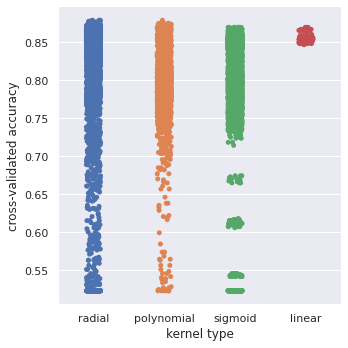

In [ ]:
sns.catplot(x = 'kernel type', y ='cross-validated accuracy', data = pca_results)

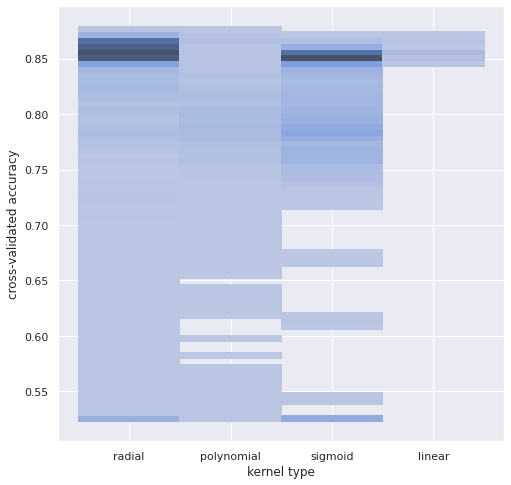

In [ ]:
sns.histplot(x = 'kernel type', y ='cross-validated accuracy', data = pca_results)
sns.set(rc = {'figure.figsize':(3,3)})

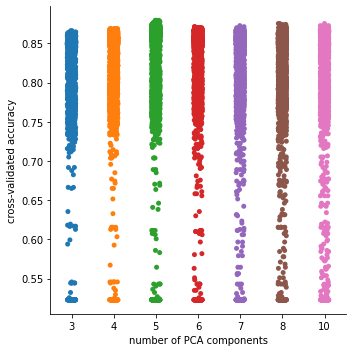

In [ ]:
sns.catplot(x = 'number of PCA components', y ='cross-validated accuracy', data = pca_results)